In [1]:
import os
import re
import random
import torch
from PIL import Image
import matplotlib.pyplot as plt

#################
#### Image 4 ####
#################
Epoch: 24
File name: epoch_24_batch_27_image_4.png


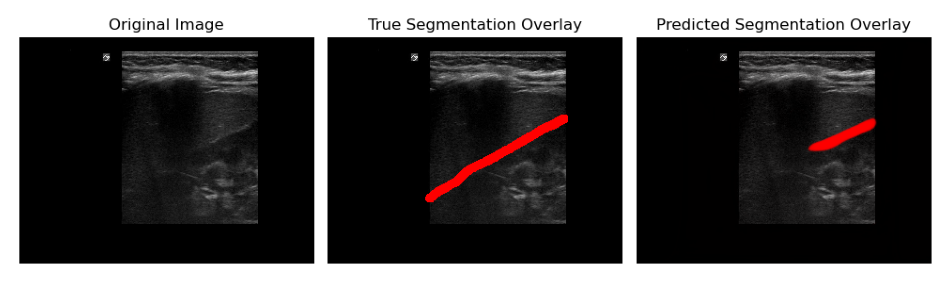


#################
#### Image 2 ####
#################
Epoch: 24
File name: epoch_24_batch_27_image_2.png


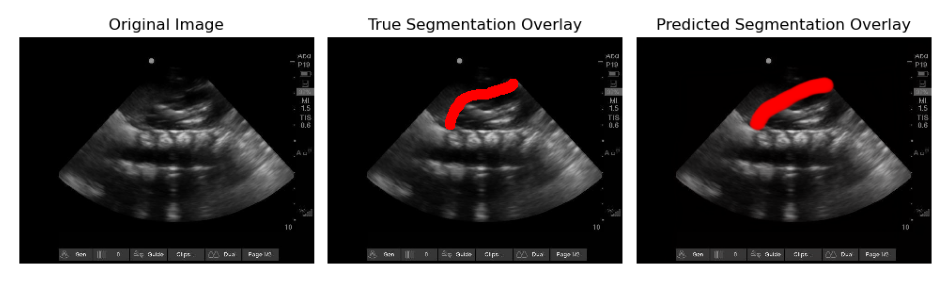


#################
#### Image 5 ####
#################
Epoch: 24
File name: epoch_24_batch_27_image_5.png


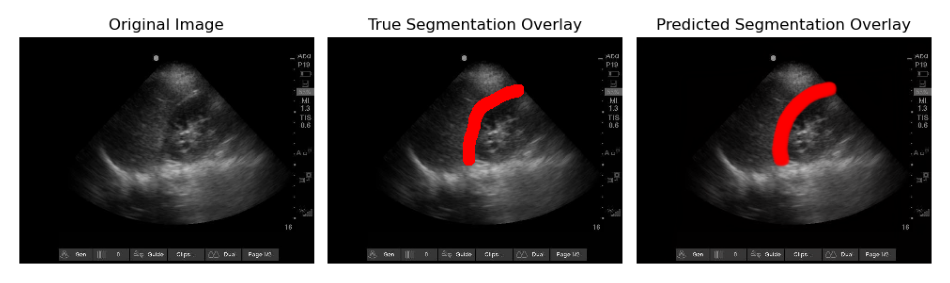


#################
#### Image 3 ####
#################
Epoch: 24
File name: epoch_24_batch_27_image_3.png


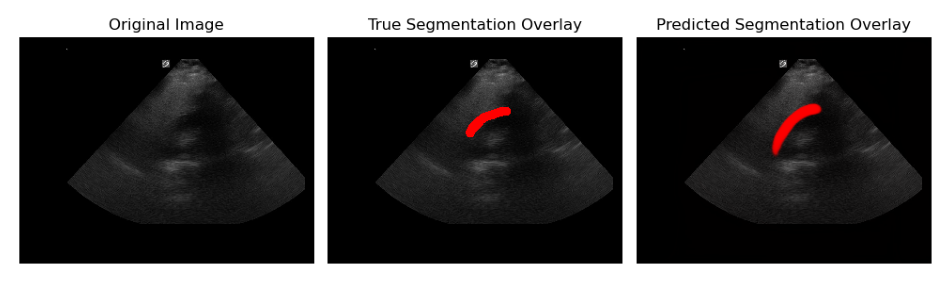


#################
#### Image 9 ####
#################
Epoch: 24
File name: epoch_24_batch_27_image_9.png


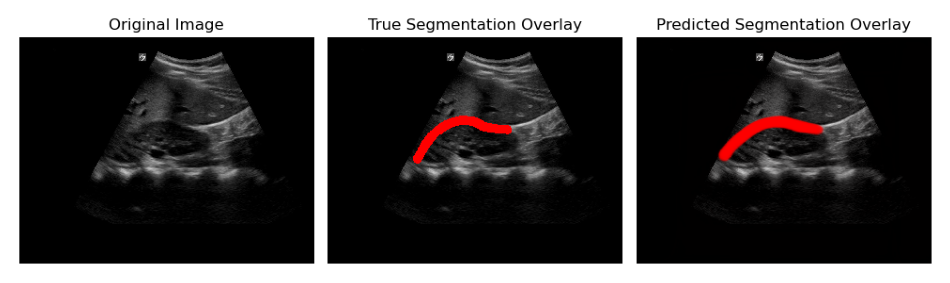


#################
#### Image 7 ####
#################
Epoch: 24
File name: epoch_24_batch_27_image_7.png


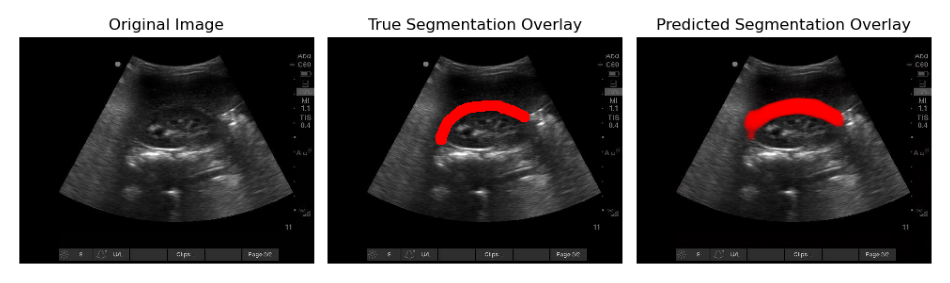


#################
#### Image 0 ####
#################
Epoch: 24
File name: epoch_24_batch_27_image_0.png


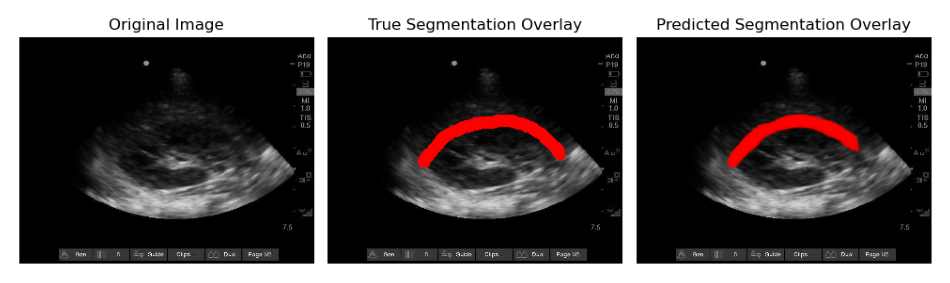


#################
#### Image 1 ####
#################
Epoch: 24
File name: epoch_24_batch_27_image_1.png


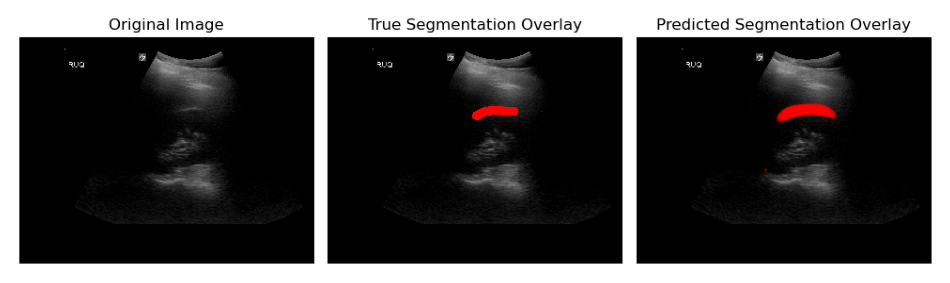


#################
#### Image 6 ####
#################
Epoch: 24
File name: epoch_24_batch_27_image_6.png


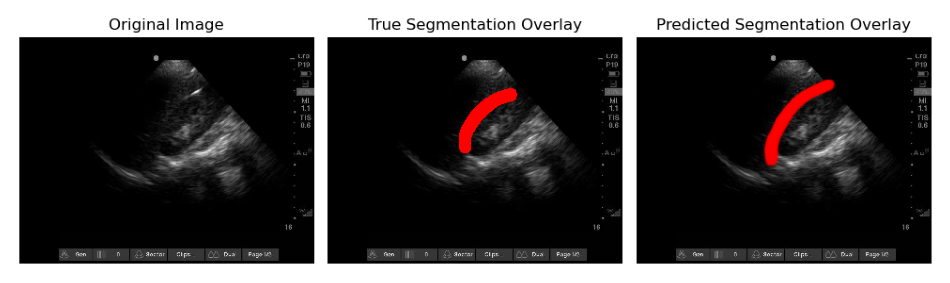


#################
#### Image 8 ####
#################
Epoch: 24
File name: epoch_24_batch_27_image_8.png


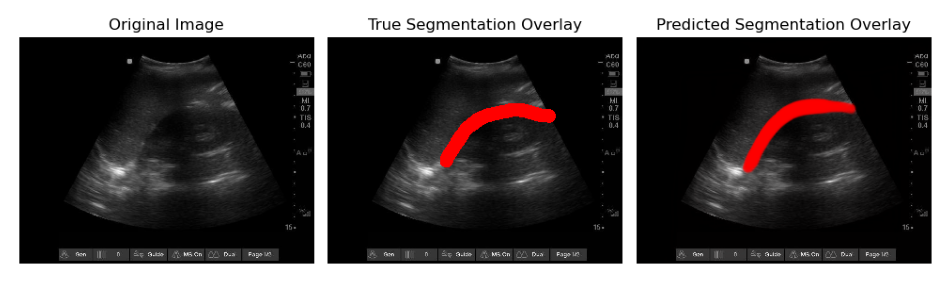

In [6]:
proj_dir = '03_14_2024_ucsf_fast_test'
run_dir = 'chocolate-bun-5'
logging_dir = '/scratch/users/austin.zane/ucsf_fast/logging/'
image_dir = os.path.join(logging_dir, proj_dir, run_dir, 'segmentation_overlays')

file_names = os.listdir(image_dir)
image_groups = {}

for file_name in file_names:
    match = re.match(r'epoch_(\d+)_batch_(\d+)_image_(\d+)\.(\w+)', file_name)
    if match:
        epoch, batch, image_num, extension = match.groups()
        if extension == 'png':  # Only consider files with .png extension
            if image_num not in image_groups:
                image_groups[image_num] = []
            image_groups[image_num].append((int(epoch), int(batch), file_name))

if len(image_groups) == 0:
    print('No images found')

# Print file names in order by epoch and then by batch for each image
for image_num, files in image_groups.items():
    print(f"#################\n#### Image {image_num} ####\n#################")
    files.sort()  # Sort files by epoch and then by batch
    
    for epoch, batch, file_name in files:
        if epoch != 24:
            continue
        print(f'Epoch: {epoch}')
        print(f'File name: {file_name}')
        img = Image.open(os.path.join(image_dir, file_name))
        
        # Set the figure size (adjust width and height as needed)
        fig, ax = plt.subplots(figsize=(12, 4))
        
        ax.imshow(img)
        ax.axis('off')
        plt.show()
    
    print()

## Randomly select images to visualize for the proposal

In [43]:
raw_image_dir = '/scratch/users/austin.zane/ucsf_fast/data/pilot_labeling/AnnotationData/MorisonPouchMasks_1-23'

raw_image_names = [f for f in os.listdir(raw_image_dir) if not '_Morison' in f and f.endswith('.png')]


In [48]:
raw_image_choice = random.sample(raw_image_names, 2)

In [49]:
raw_image_choice

['A_EM61ro_0.png', 'A_gkvD8D_149.png']

# Verify that annotation and image processing was successful

Verfying correctness of `/accounts/campus/austin.zane/ucsf_fast/notebooks/accessing_mdai_data.py`

If masks and images match, we are good to go.

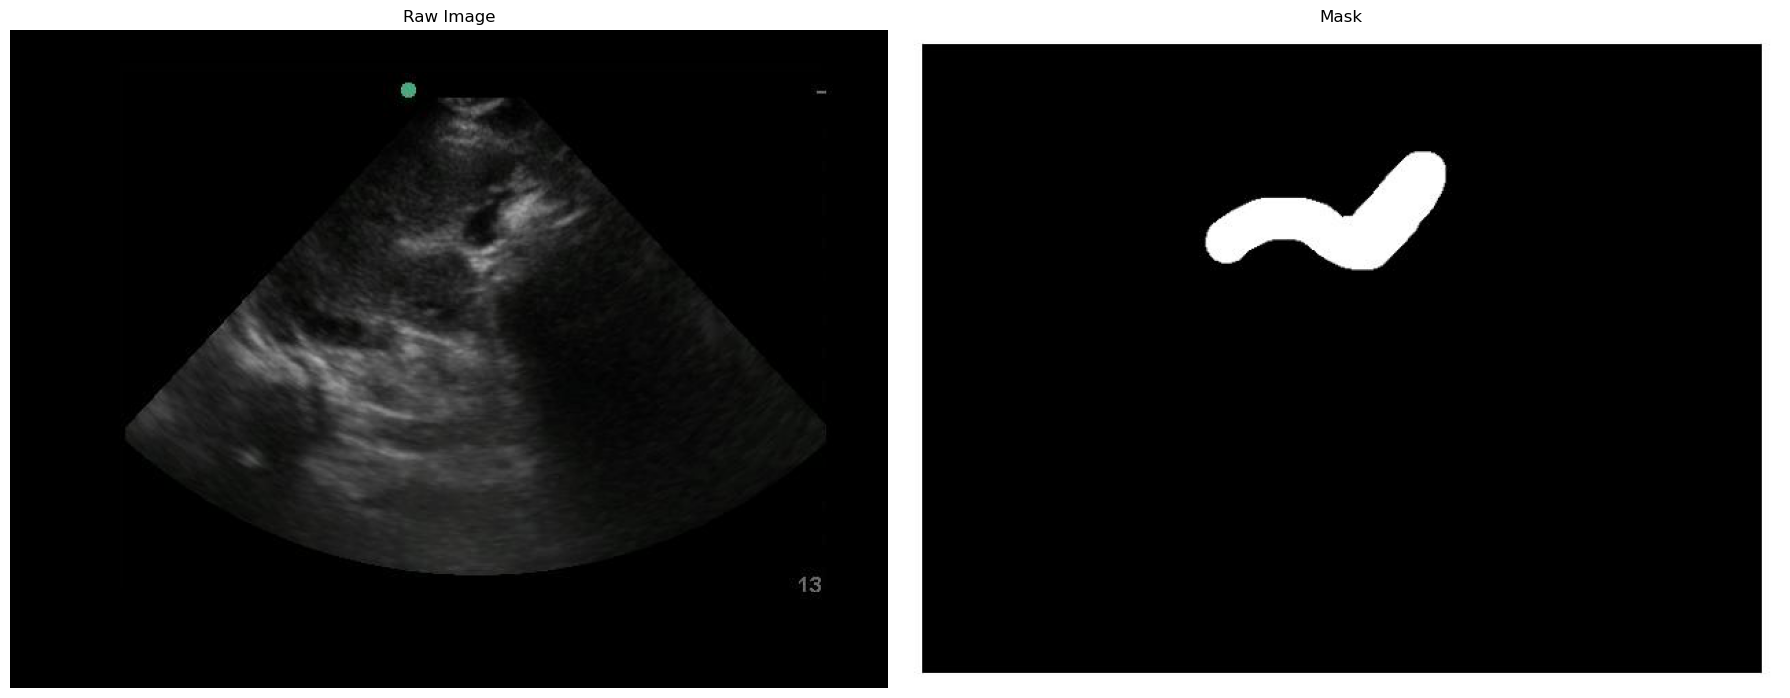

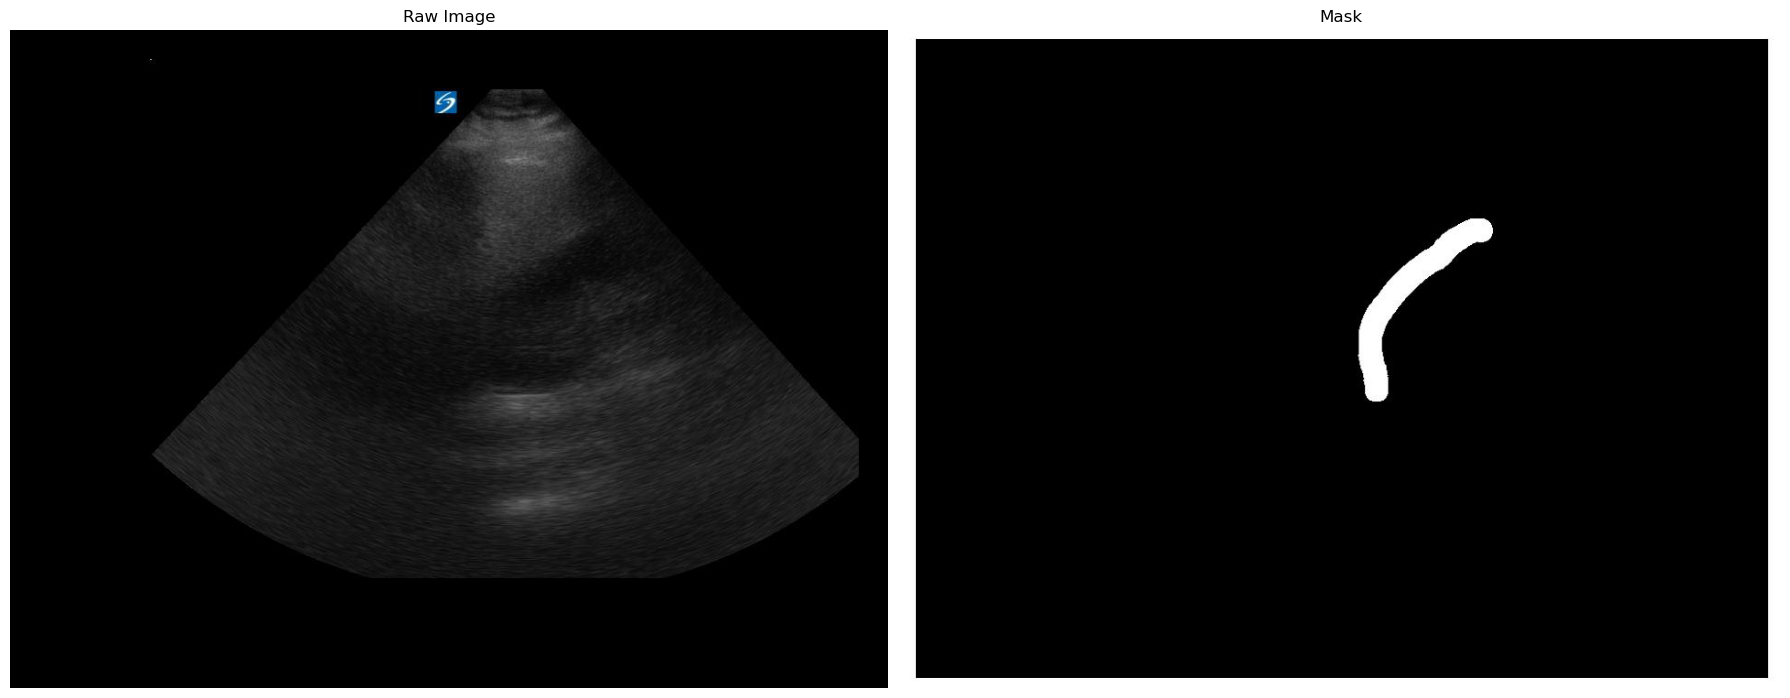

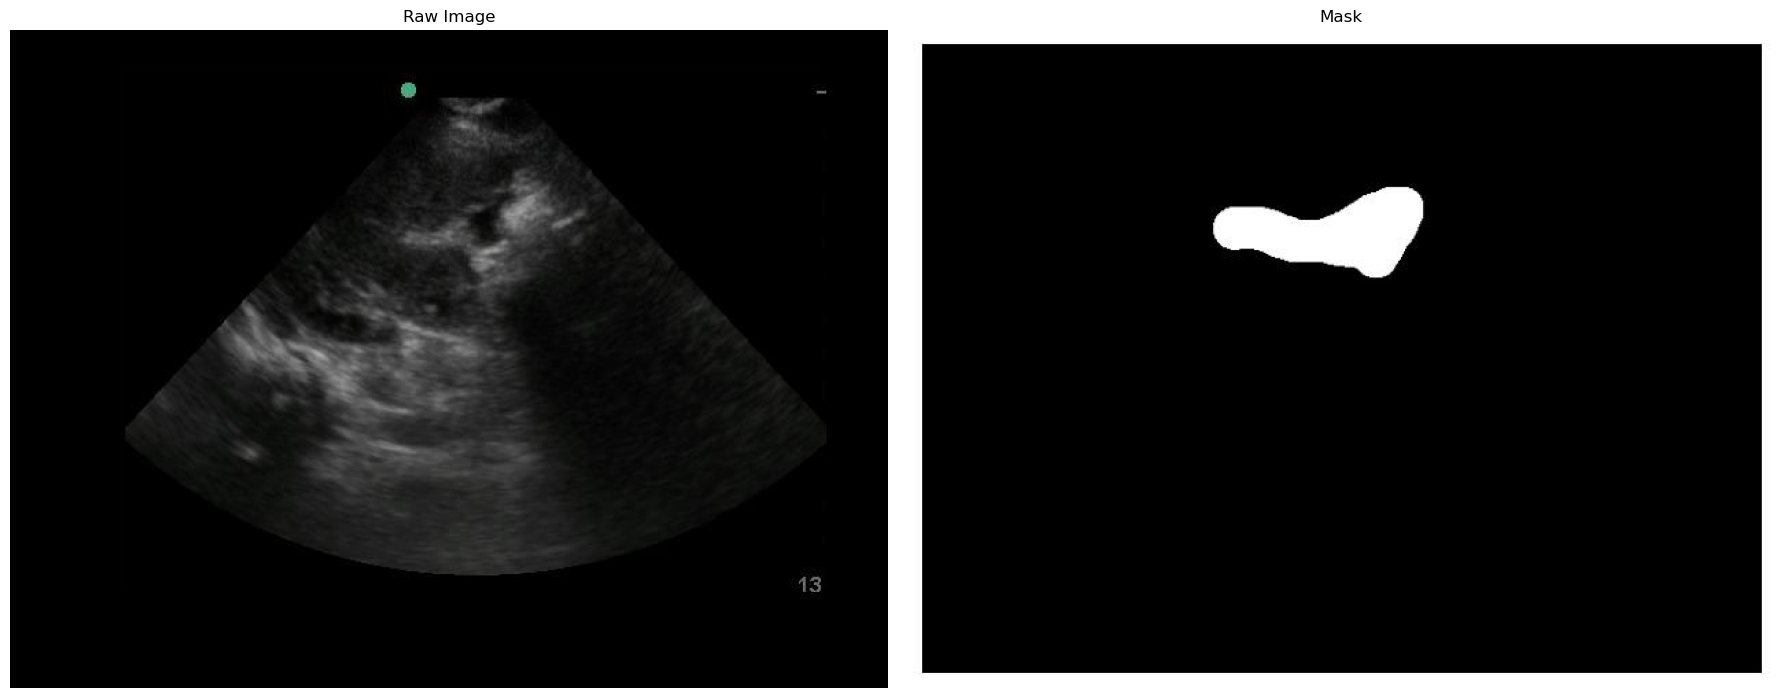

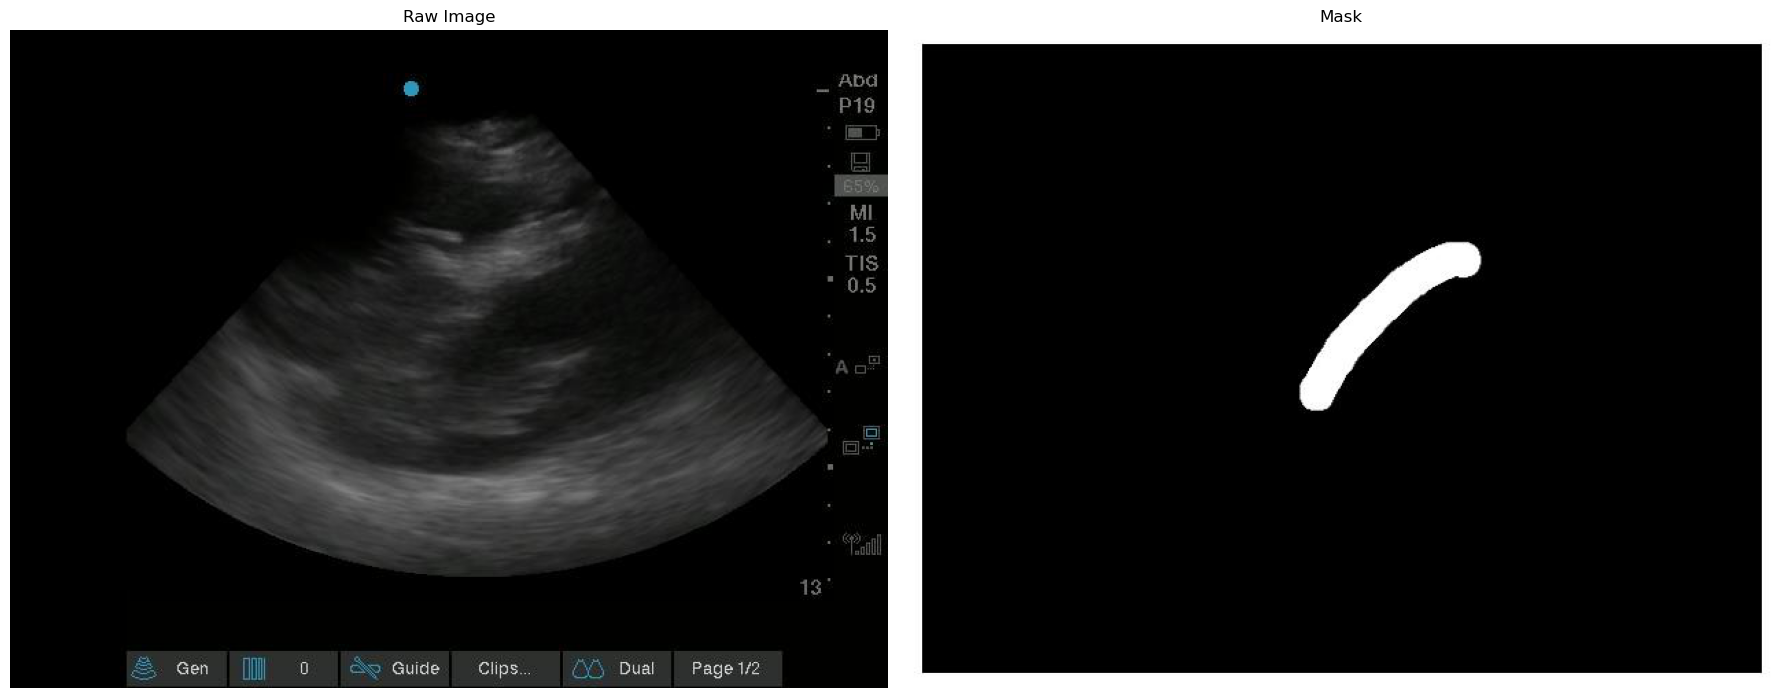

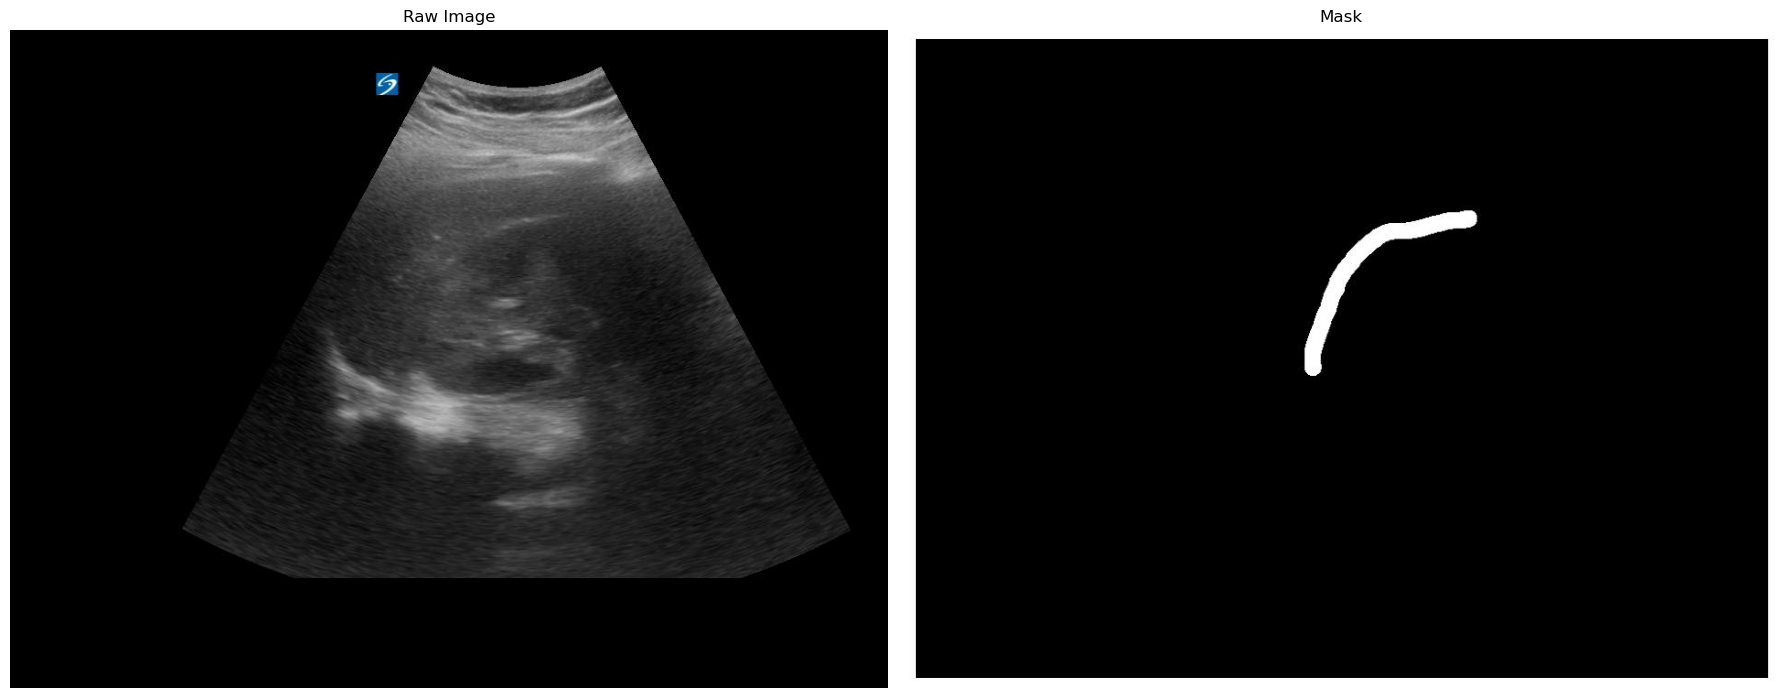

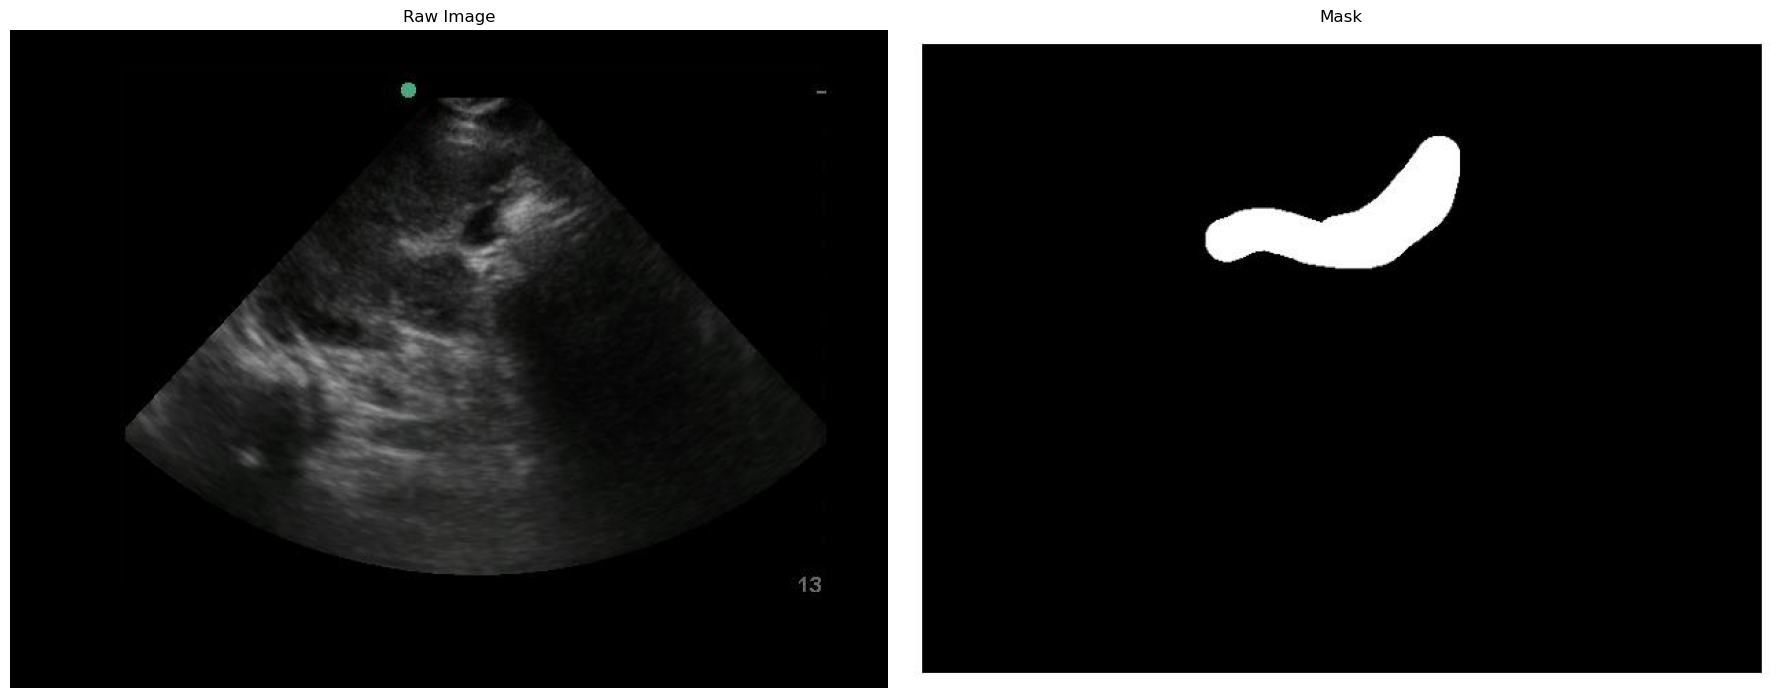

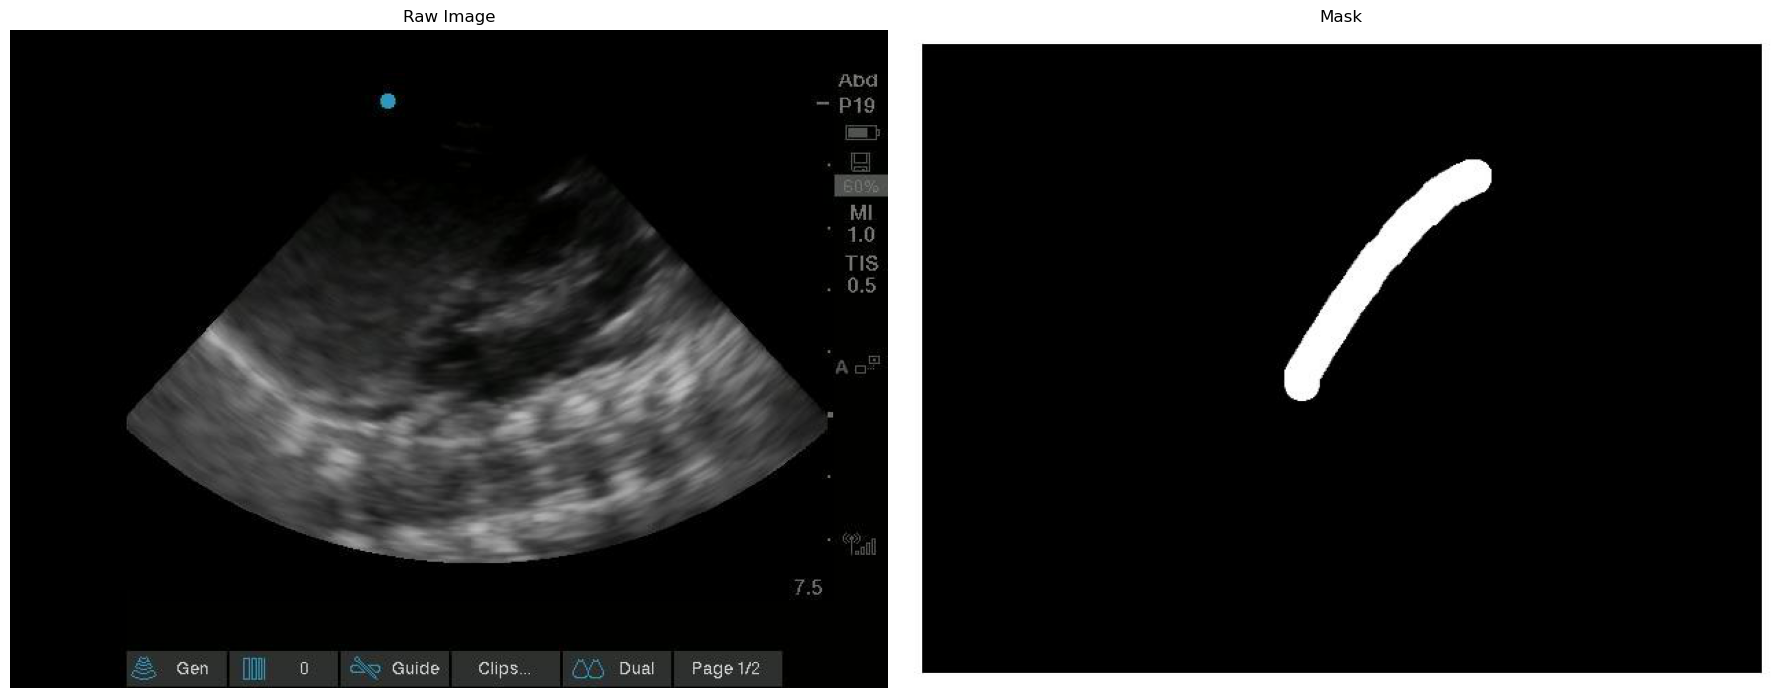

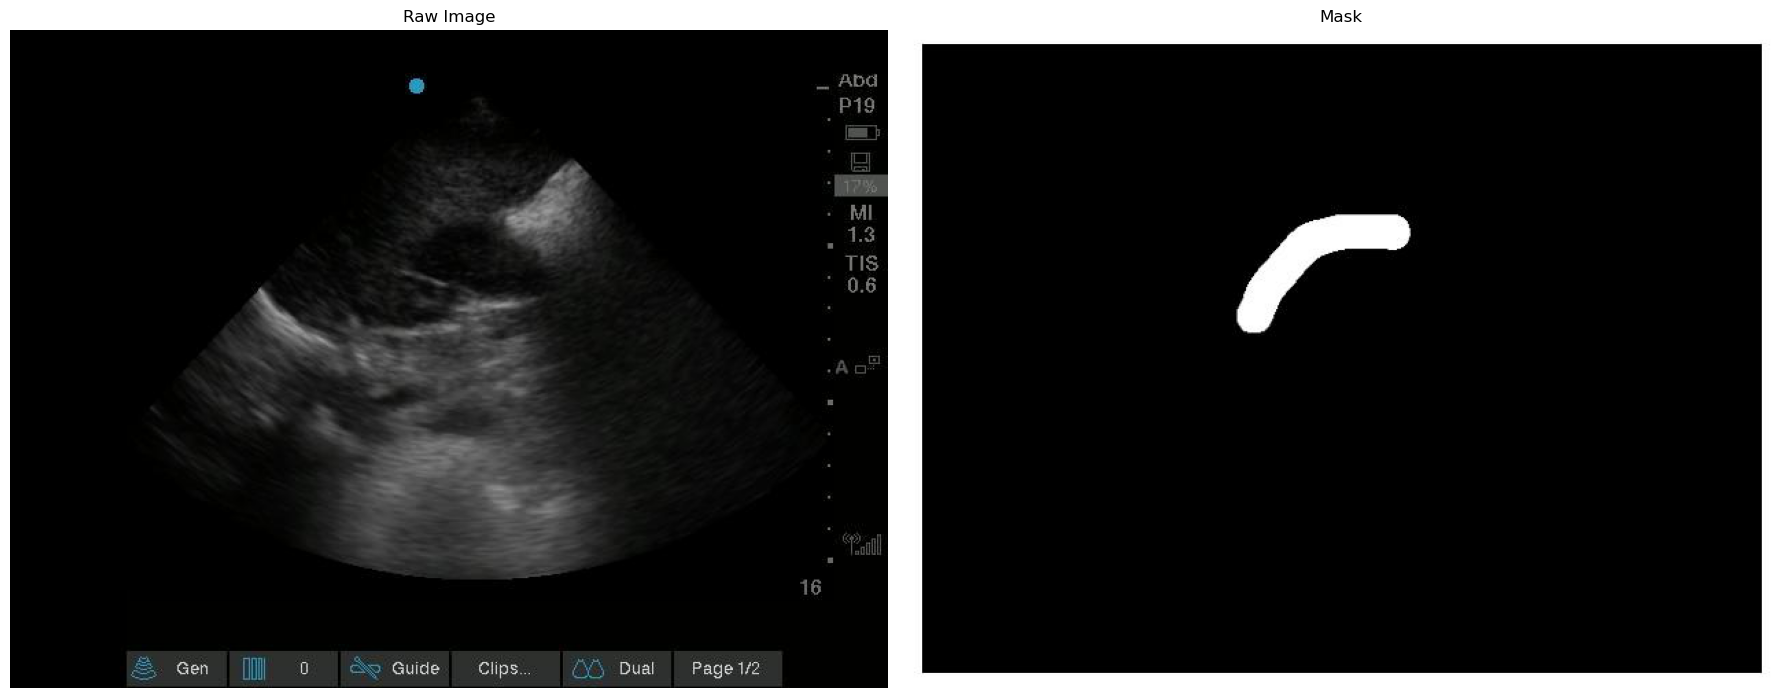

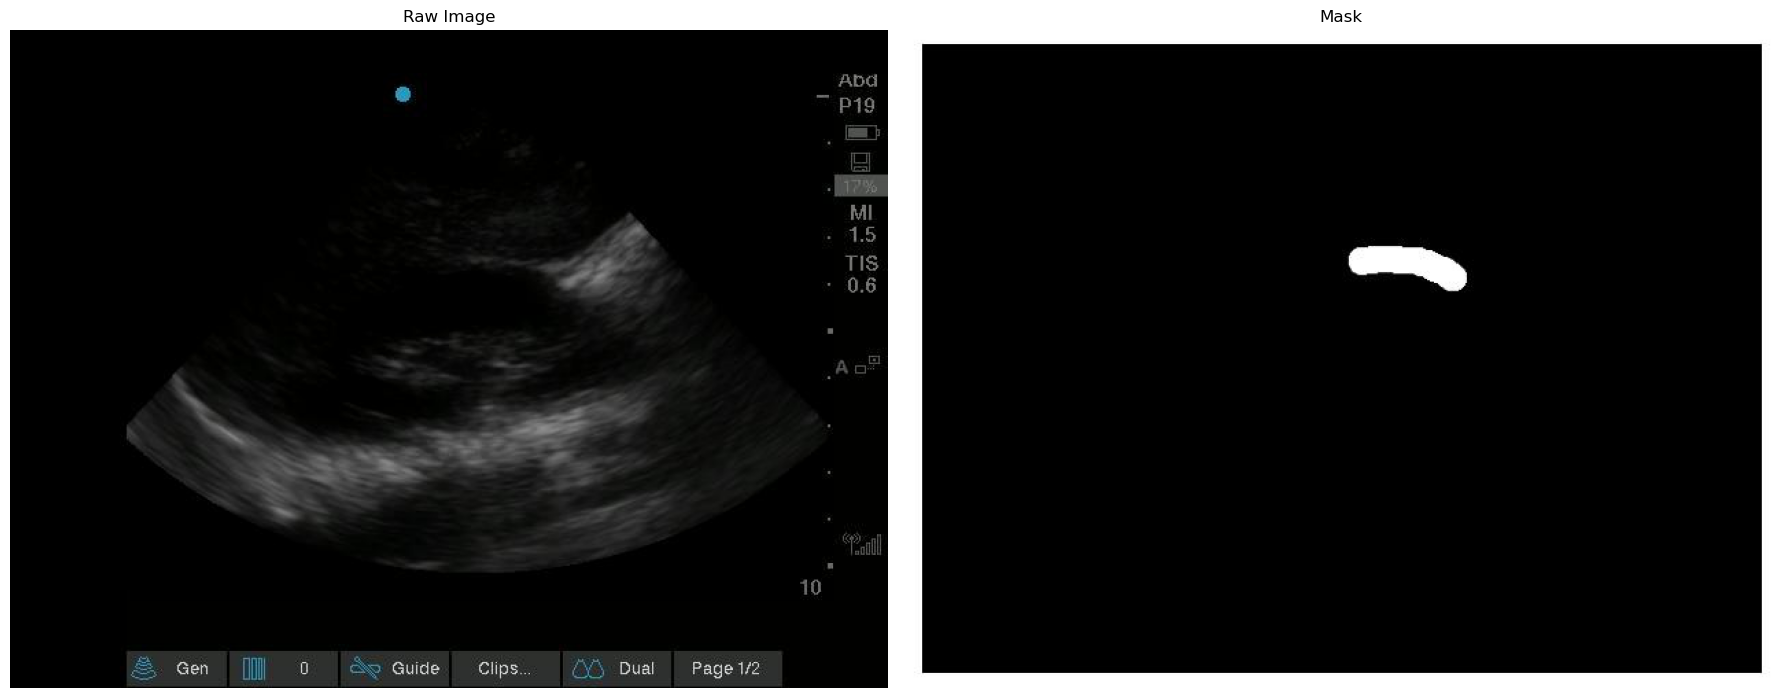

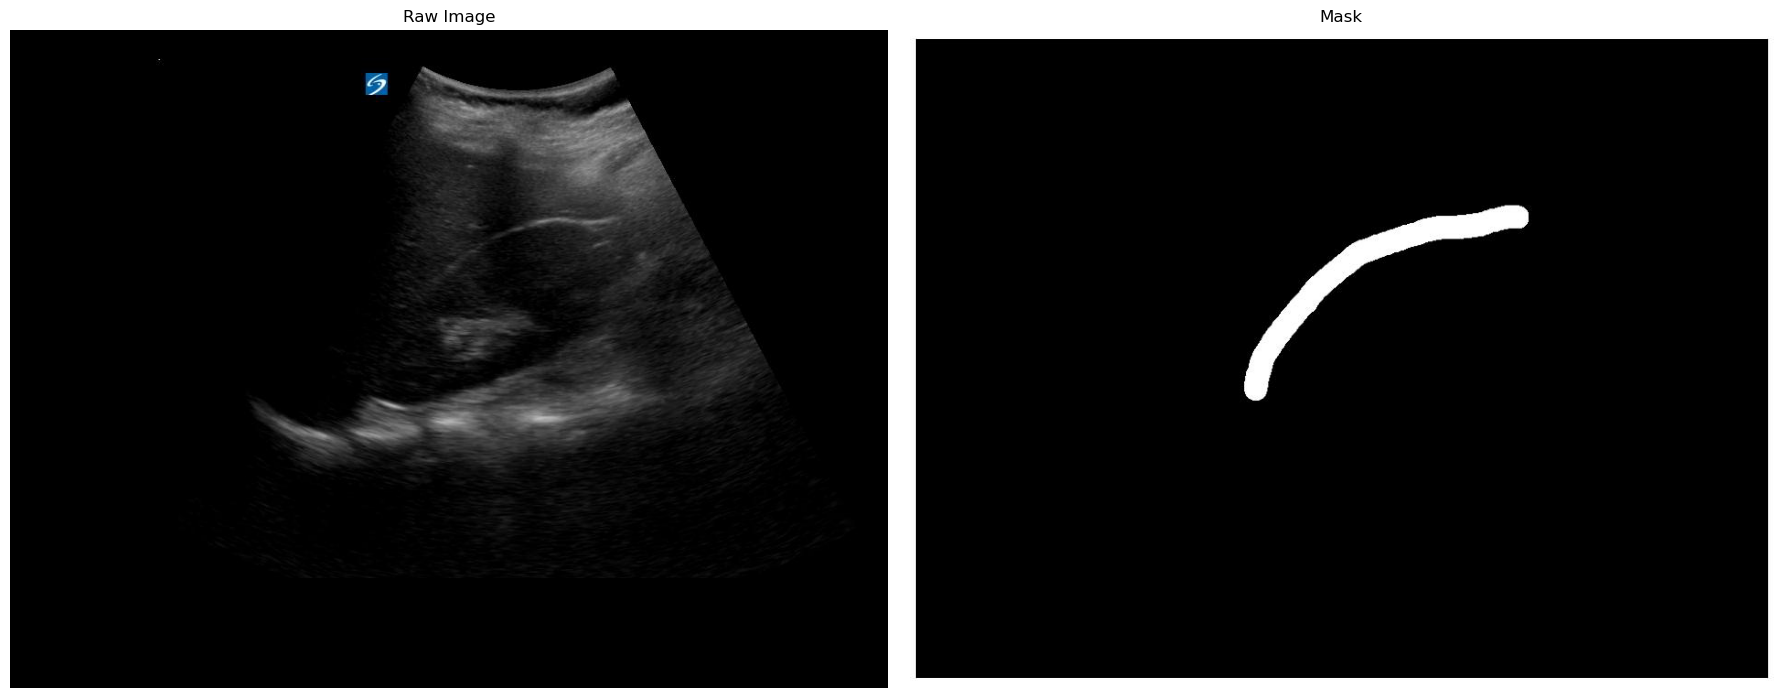

In [8]:
raw_image_dir = '/scratch/users/austin.zane/ucsf_fast/data/labeled_fast_morison/raw_images'
mask_dir = '/scratch/users/austin.zane/ucsf_fast/data/labeled_fast_morison/masks'

mask_file_names = os.listdir(mask_dir)
mask_file_names_sampled = random.sample(mask_file_names, 10)

raw_image_file_names = [x.split('_Mask')[0] + '.jpg' for x in mask_file_names_sampled]

for mask_fname in mask_file_names_sampled:
    raw_img_fname = mask_fname.split('_Mask')[0] + '.jpg'
    
    mask_img = Image.open(os.path.join(mask_dir, mask_fname))
    raw_img = Image.open(os.path.join(raw_image_dir, raw_img_fname))
        
    # Set the figure size (adjust width and height as needed)
    fig, ax = plt.subplots(1, 2, figsize=(18, 9))
    
    # Display the raw image
    ax[0].imshow(raw_img, cmap='gray')
    ax[0].set_title('Raw Image')
    ax[0].axis('off')
    
    # Display the mask image
    ax[1].imshow(mask_img, cmap='gray')
    ax[1].set_title('Mask')
    ax[1].axis('off')
    
    plt.tight_layout()
    plt.show()
    

# Visualizing right before feeding into model

This is a visualization of the raw_images, masks, and free fluid labels just before they are fed into the model in the training loop.

In [12]:
batch_data = torch.load('/scratch/users/austin.zane/ucsf_fast/data/labeled_fast_morison/debugging/training_loop_data_check.pth')
batch_images = batch_data['images']
batch_masks = batch_data['masks']
batch_labels = batch_data['free_fluid_labels']

Convert the image files to something that can be visualized.

Image shape: torch.Size([1, 736, 960])
Mask shape: torch.Size([1, 736, 960])
FF label: -1


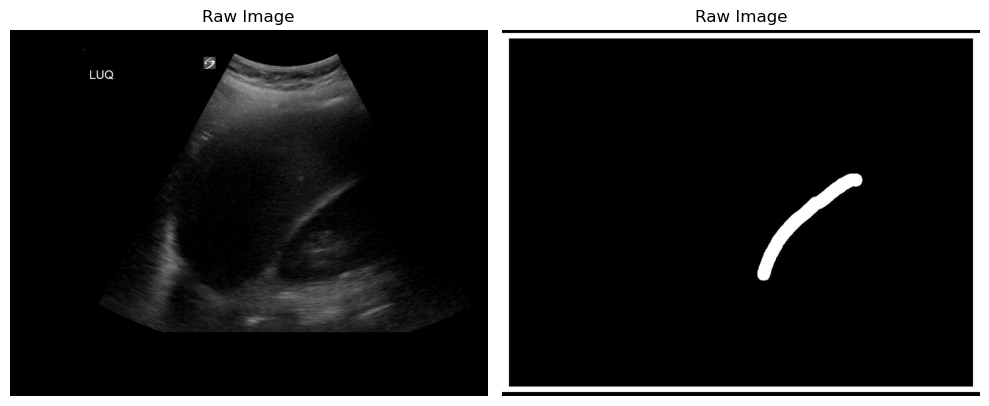

Image shape: torch.Size([1, 736, 960])
Mask shape: torch.Size([1, 736, 960])
FF label: -1


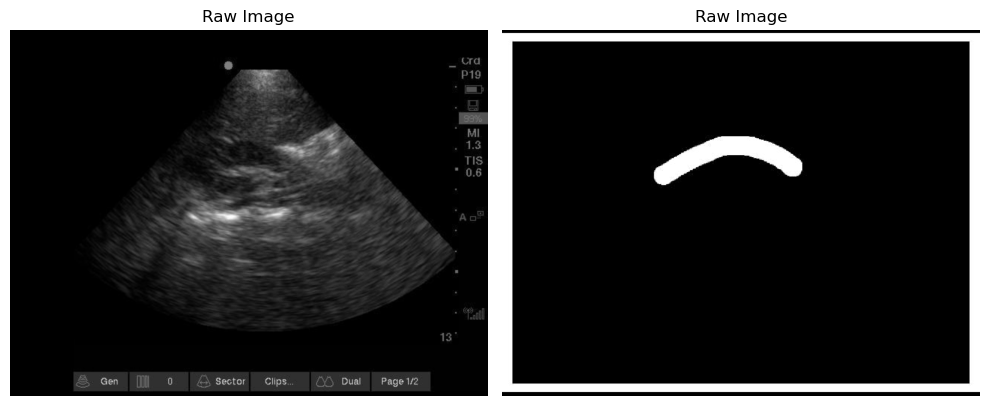

Image shape: torch.Size([1, 736, 960])
Mask shape: torch.Size([1, 736, 960])
FF label: 1


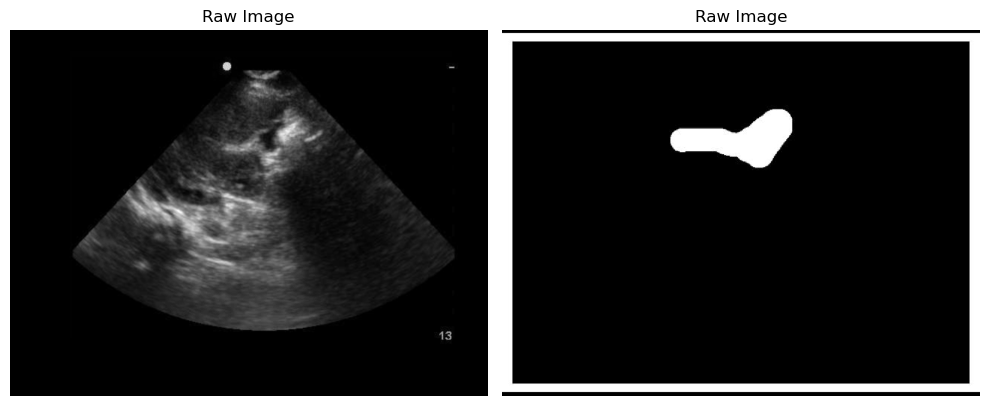

Image shape: torch.Size([1, 736, 960])
Mask shape: torch.Size([1, 736, 960])
FF label: -1


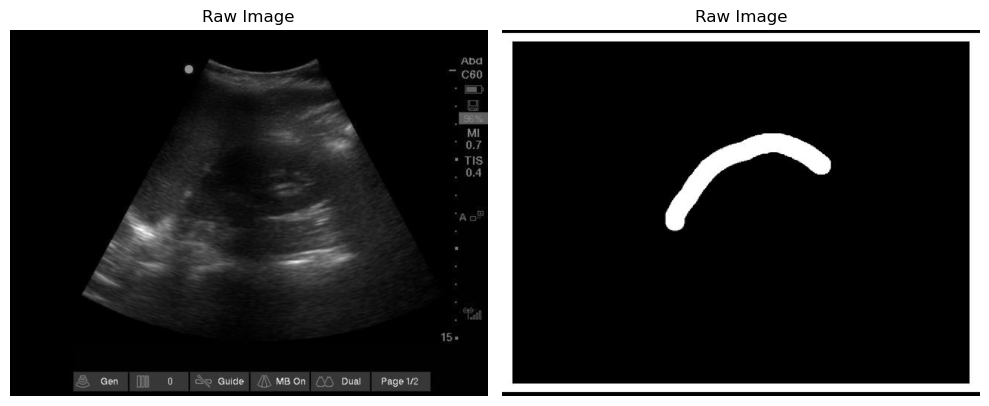

Image shape: torch.Size([1, 736, 960])
Mask shape: torch.Size([1, 736, 960])
FF label: -1


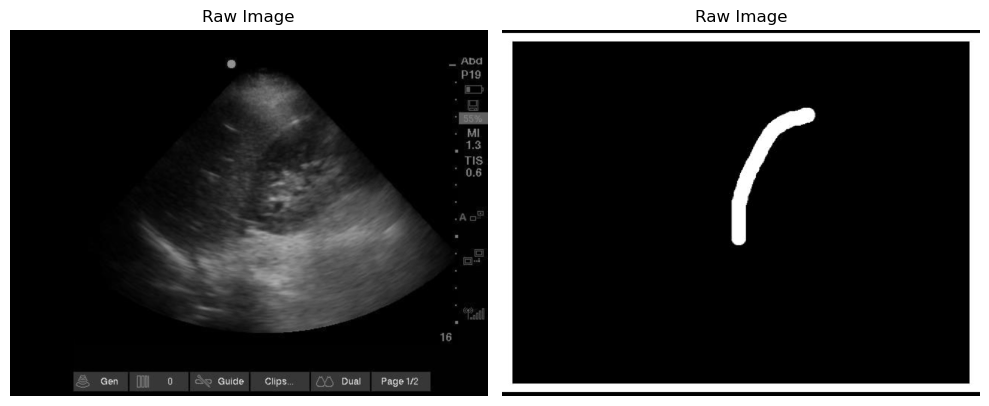

Image shape: torch.Size([1, 736, 960])
Mask shape: torch.Size([1, 736, 960])
FF label: 1


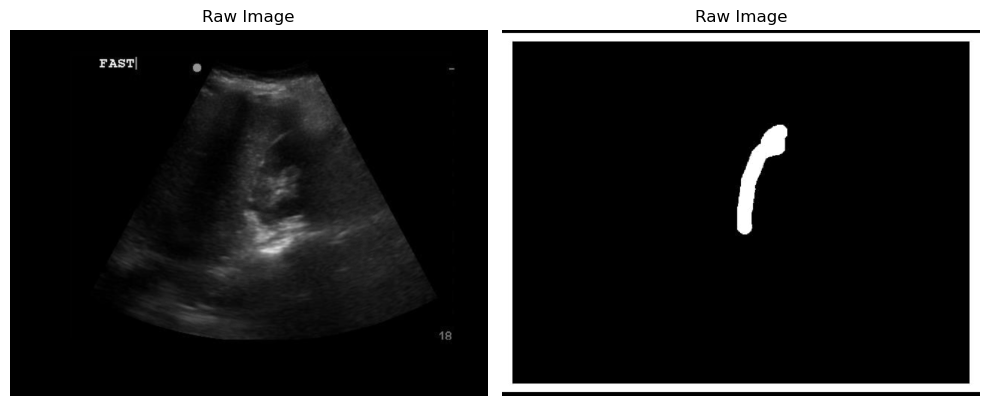

Image shape: torch.Size([1, 736, 960])
Mask shape: torch.Size([1, 736, 960])
FF label: -1


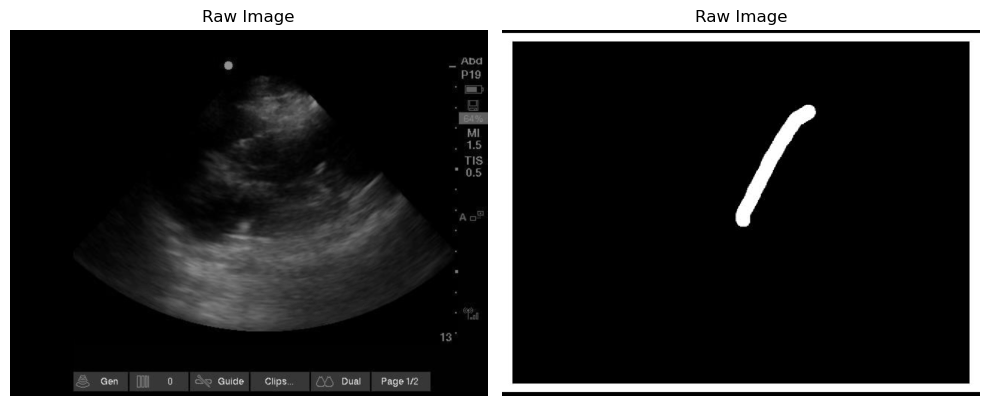

Image shape: torch.Size([1, 736, 960])
Mask shape: torch.Size([1, 736, 960])
FF label: -1


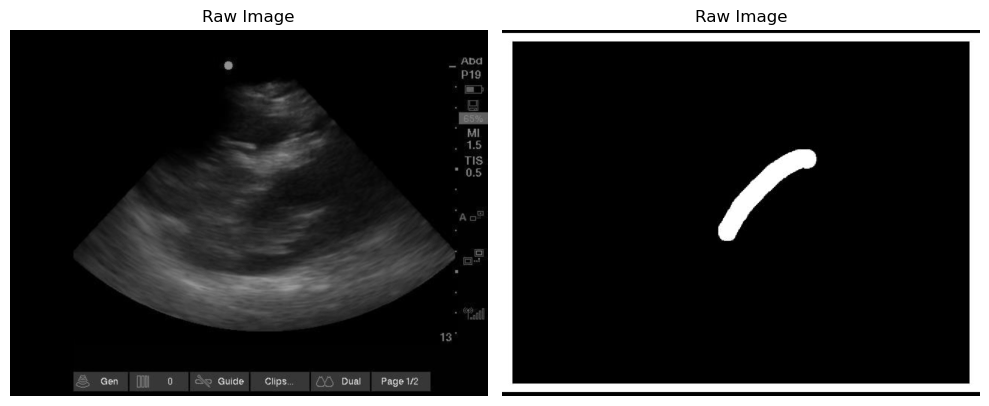

Image shape: torch.Size([1, 736, 960])
Mask shape: torch.Size([1, 736, 960])
FF label: -1


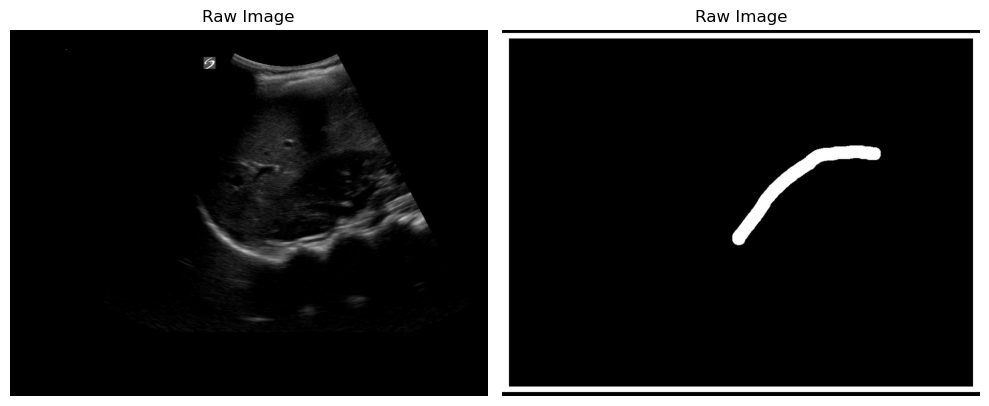

Image shape: torch.Size([1, 736, 960])
Mask shape: torch.Size([1, 736, 960])
FF label: 1


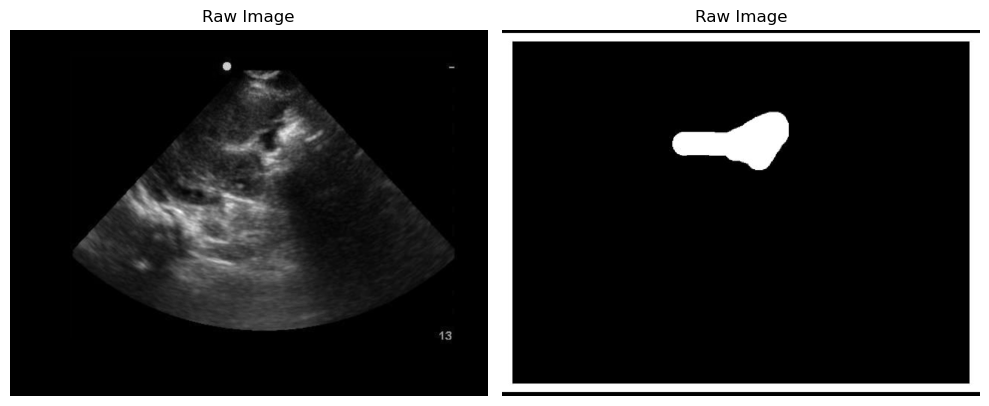

In [37]:
for idx in range(len(batch_images)):
    img = batch_images[idx]
    mask = batch_masks[idx]
    label = batch_labels[idx]

    print(f'Image shape: {img.size()}')
    print(f'Mask shape: {mask.size()}')
    print(f'FF label: {label}')

    normalized_img = (img + 1) / 2
    img = normalized_img.squeeze(0)
    mask = mask.squeeze(0)


    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Raw Image')
    ax[0].axis('off')


    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title('Raw Image')
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

What's with the weird padding??

Image shape: torch.Size([1, 720, 960])
Mask shape: torch.Size([1, 720, 960])
FF label: -1


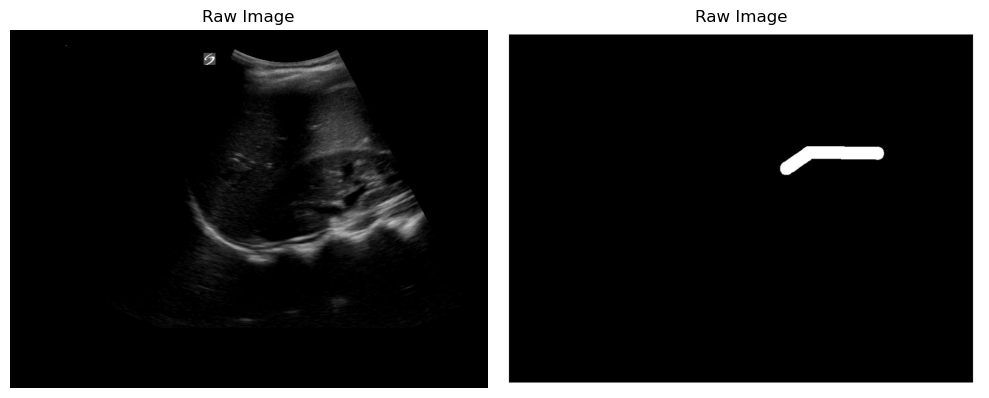

Image shape: torch.Size([1, 720, 960])
Mask shape: torch.Size([1, 720, 960])
FF label: -1


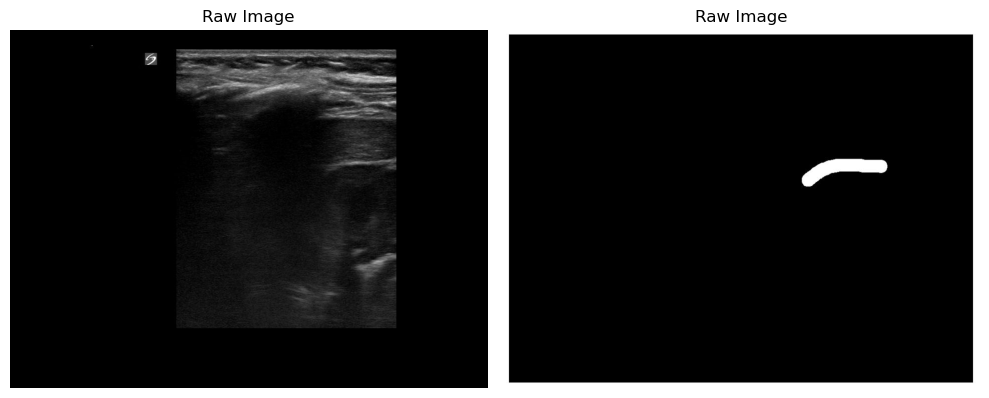

Image shape: torch.Size([1, 720, 960])
Mask shape: torch.Size([1, 720, 960])
FF label: -1


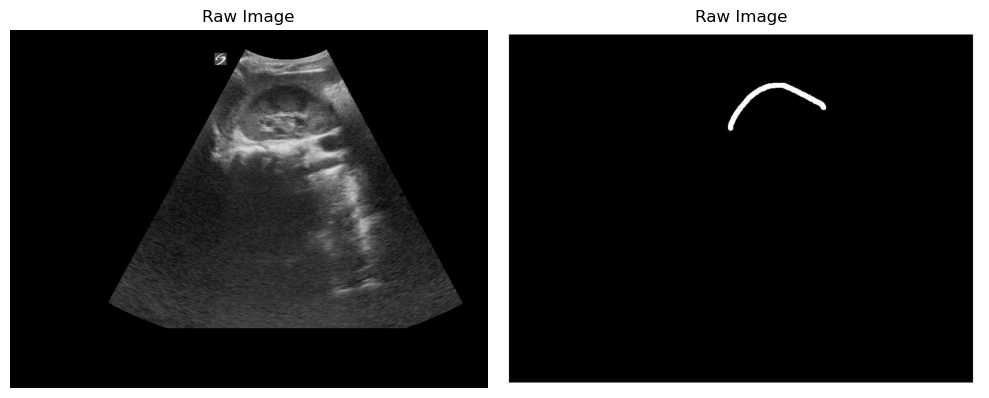

Image shape: torch.Size([1, 720, 960])
Mask shape: torch.Size([1, 720, 960])
FF label: 1


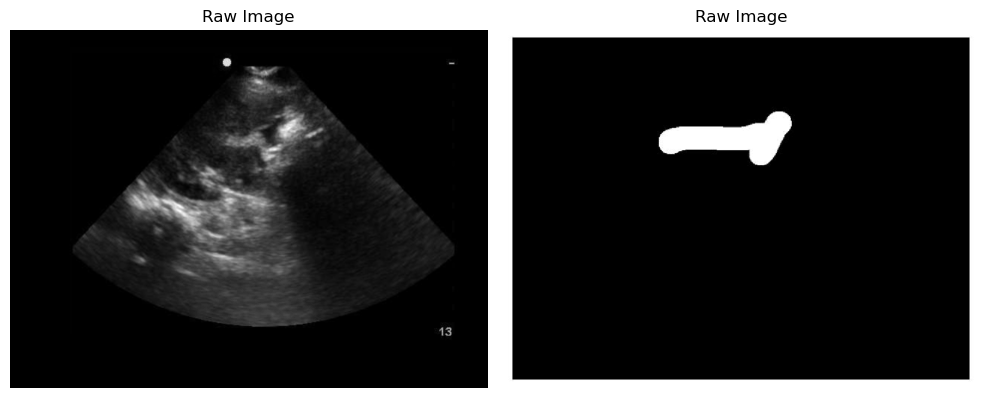

Image shape: torch.Size([1, 720, 960])
Mask shape: torch.Size([1, 720, 960])
FF label: -1


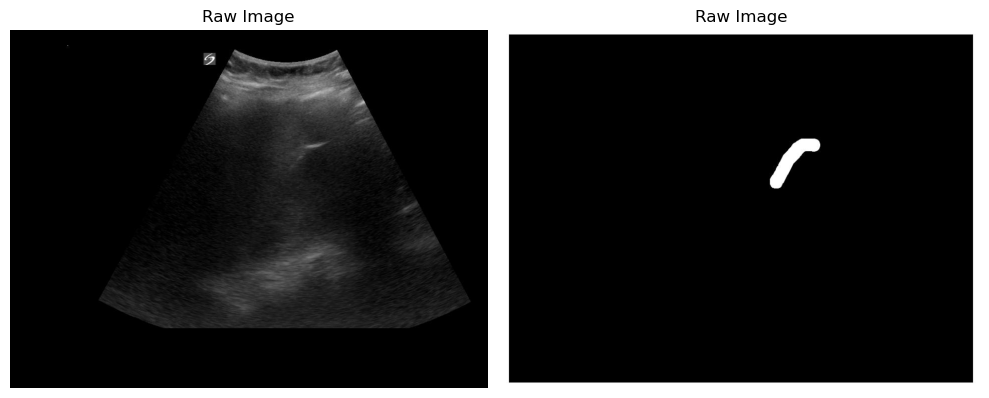

Image shape: torch.Size([1, 720, 960])
Mask shape: torch.Size([1, 720, 960])
FF label: -1


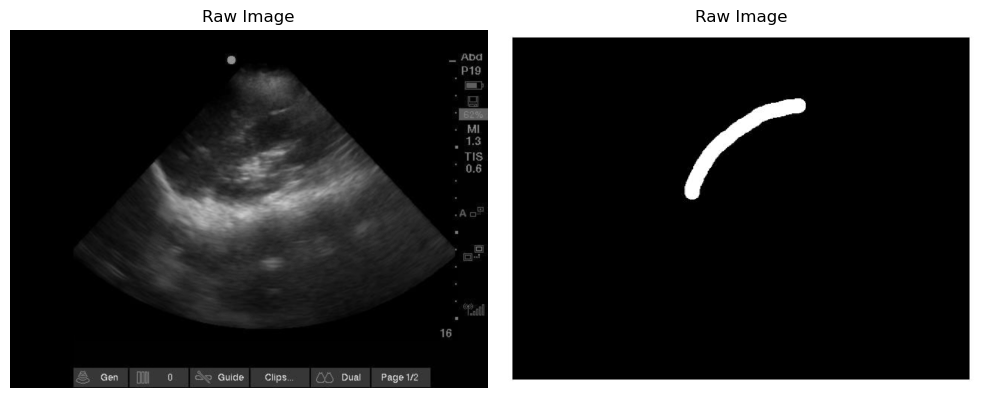

Image shape: torch.Size([1, 720, 960])
Mask shape: torch.Size([1, 720, 960])
FF label: -1


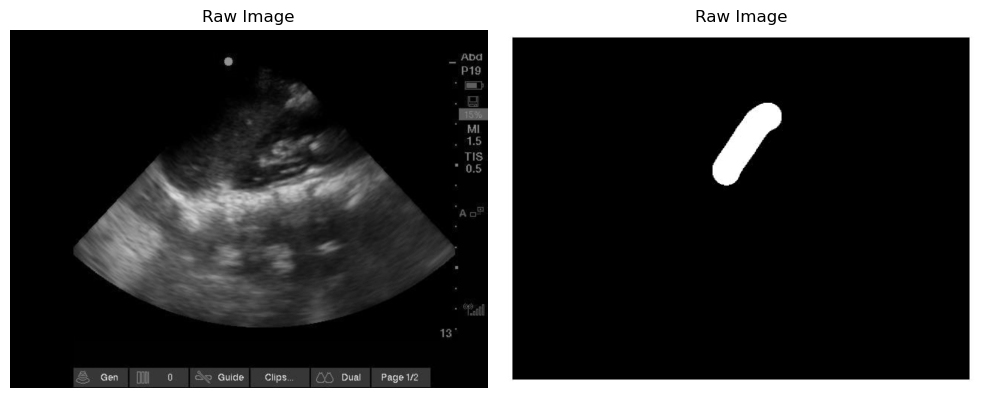

Image shape: torch.Size([1, 720, 960])
Mask shape: torch.Size([1, 720, 960])
FF label: -1


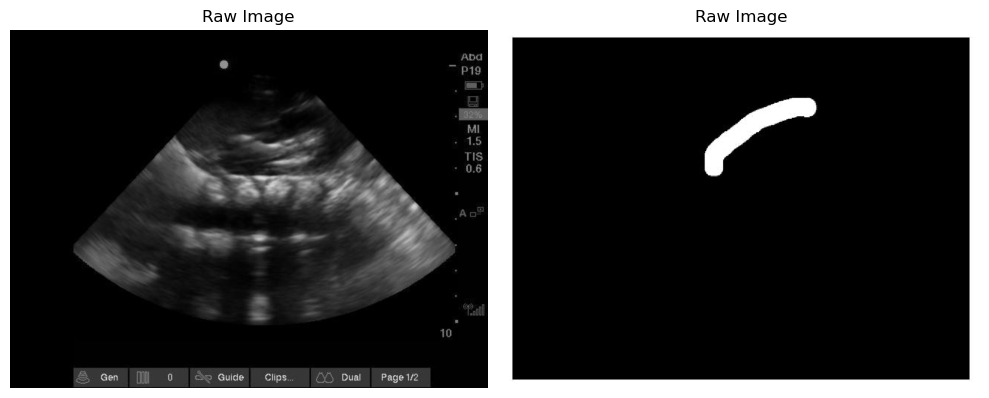

Image shape: torch.Size([1, 720, 960])
Mask shape: torch.Size([1, 720, 960])
FF label: -1


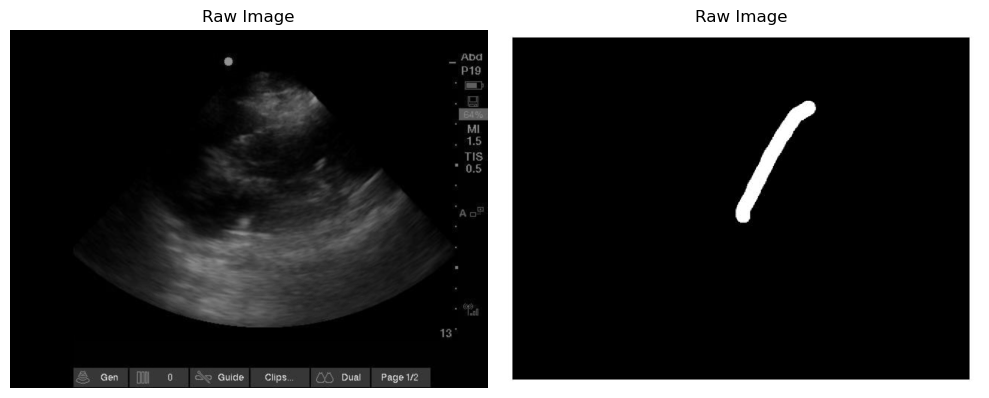

Image shape: torch.Size([1, 720, 960])
Mask shape: torch.Size([1, 720, 960])
FF label: -1


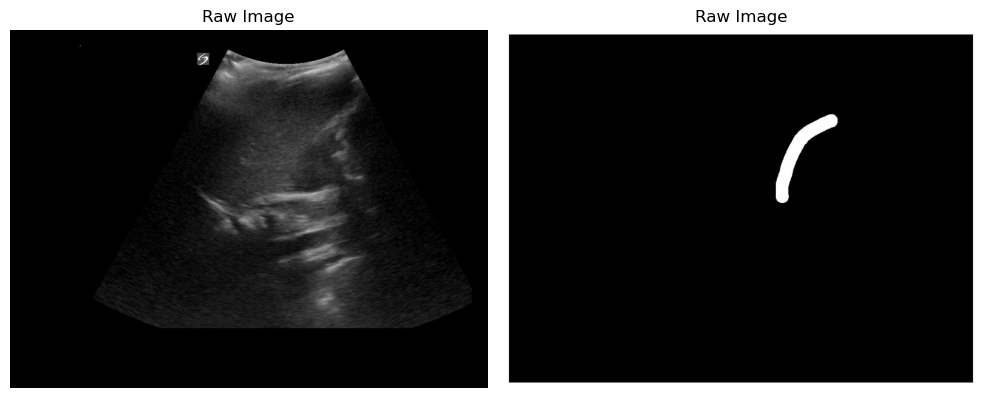

In [39]:
batch_data = torch.load('/scratch/users/austin.zane/ucsf_fast/data/labeled_fast_morison/debugging/training_loop_unpadded_data_check.pth')
batch_images = batch_data['images']
batch_masks = batch_data['masks']
batch_labels = batch_data['free_fluid_labels']

for idx in range(len(batch_images)):
    img = batch_images[idx]
    mask = batch_masks[idx]
    owo = mask
    label = batch_labels[idx]

    print(f'Image shape: {img.size()}')
    print(f'Mask shape: {mask.size()}')
    print(f'FF label: {label}')

    normalized_img = (img + 1) / 2
    img = normalized_img.squeeze(0)
    mask = mask.squeeze(0)


    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    ax[0].imshow(img, cmap='gray')
    ax[0].set_title('Raw Image')
    ax[0].axis('off')


    ax[1].imshow(mask, cmap='gray')
    ax[1].set_title('Raw Image')
    ax[1].axis('off')

    plt.tight_layout()
    plt.show()

So it's happening before it gets padded in the training loop. I think it had to do with how the mask was being saved after taking from mdai. Here is an image after the fix but before rerunning all of the others. 

Jupyter notebook has a white background so I'll also visualize the negative so that a border is obvious no matter the background color.

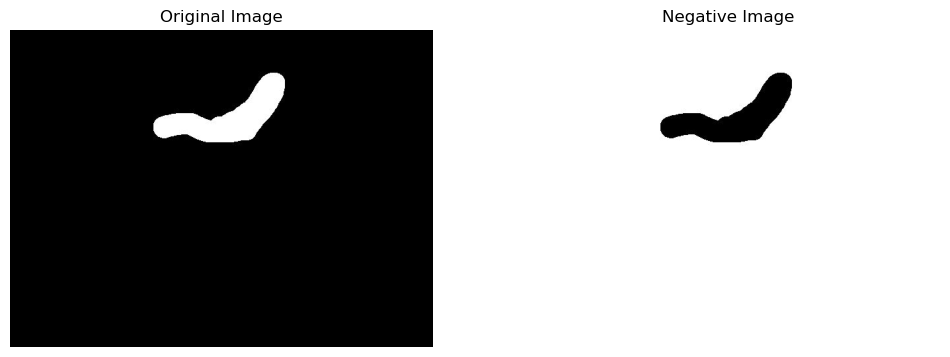

In [5]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
import os

debug_bdir = '/scratch/users/austin.zane/ucsf_fast/data/labeled_fast_morison/debugging'
fixed_mask = Image.open(os.path.join(debug_dir, 'PIL_saved_mask.jpg'))

# Ensure the image is in grayscale mode
if fixed_mask.mode != 'L':
    fixed_mask = fixed_mask.convert('L')

# Invert the image to get the negative
inverted_image = ImageOps.invert(fixed_mask)

# Display the original and the negative image using matplotlib
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(fixed_mask, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(inverted_image, cmap='gray')
plt.title('Negative Image')
plt.axis('off')

plt.show()


In [7]:
fixed_mask.size

(640, 480)